In [1]:
# notebooks/era5_baseline_pipeline.ipynb
# Runs end-to-end baseline pipeline for ERA5 precipitation prediction

In [2]:
# Pip installs (uncomment if running in Colab)
# !pip install xarray gcsfs zarr numpy pandas scikit-learn

In [3]:
import sys
import os
from pathlib import Path
import xarray as xr
import numpy as np

sys.path.append(str(Path("..") / "src"))
from era5_dataloader import era5_data_loader

# LOAD DATA

In [4]:
# DATA LOADER PARAMETERS 
base_url = "gs://weatherbench2/datasets/era5/1959-2023_01_10-6h-240x121_equiangular_with_poles_conservative.zarr"

selected_variables = [
    "specific_humidity",
    "vertical_velocity",
    "temperature",
    "relative_humidity",
    "geopotential",
    "u_component_of_wind",
    "v_component_of_wind",
    "divergence",
    "total_precipitation_6hr"
]

region = {"type": "point", "lat": 30.0, "lon": 270.0}

selected_levels = None
average_levels = True
daily_resample = True

time_range = ("2013-01-01", "2020-12-31")

data_folder = Path("..") / "data"

In [5]:
local_file = era5_data_loader(
    base_url=base_url,
    variables=selected_variables,
    region=region,
    levels=selected_levels,
    average_levels=average_levels,
    daily_resample=daily_resample,
    time_range=time_range,
    data_folder=data_folder
)


=== ERA5 DATA LOADER ===

Available vars: ['10m_u_component_of_wind', '10m_v_component_of_wind', '10m_wind_speed', '2m_dewpoint_temperature', '2m_temperature', 'above_ground', 'ageostrophic_wind_speed', 'angle_of_sub_gridscale_orography', 'anisotropy_of_sub_gridscale_orography', 'boundary_layer_height', 'divergence', 'eddy_kinetic_energy', 'geopotential', 'geopotential_at_surface', 'geostrophic_wind_speed', 'high_vegetation_cover', 'integrated_vapor_transport', 'lake_cover', 'land_sea_mask', 'lapse_rate', 'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation', 'low_vegetation_cover', 'mean_sea_level_pressure', 'mean_surface_latent_heat_flux', 'mean_surface_net_long_wave_radiation_flux', 'mean_surface_net_short_wave_radiation_flux', 'mean_surface_sensible_heat_flux', 'mean_top_downward_short_wave_radiation_flux', 'mean_top_net_long_wave_radiation_flux', 'mean_top_net_short_wave_radiation_flux', 'mean_vertically_integrated_moisture_divergence', 'potential_vorticity', 'relat

# PREPROCESS DATA

In [23]:
import matplotlib.pyplot as plt

In [16]:
ds = xr.open_zarr(local_file)

In [17]:
ds

<xarray.Dataset> Size: 129kB
Dimensions:              (time: 2922)
Coordinates:
  * time                 (time) datetime64[ns] 23kB 2013-01-01 ... 2020-12-31
    latitude             float64 8B ...
    longitude            float64 8B ...
Data variables:
    divergence           (time) float32 12kB dask.array<chunksize=(1,), meta=np.ndarray>
    geopotential         (time) float32 12kB dask.array<chunksize=(1,), meta=np.ndarray>
    relative_humidity    (time) float32 12kB dask.array<chunksize=(1,), meta=np.ndarray>
    specific_humidity    (time) float32 12kB dask.array<chunksize=(1,), meta=np.ndarray>
    temperature          (time) float32 12kB dask.array<chunksize=(1,), meta=np.ndarray>
    total_precipitation  (time) float32 12kB dask.array<chunksize=(1,), meta=np.ndarray>
    u_component_of_wind  (time) float32 12kB dask.array<chunksize=(1,), meta=np.ndarray>
    v_component_of_wind  (time) float32 12kB dask.array<chunksize=(1,), meta=np.ndarray>
    vertical_velocity    (time) float32 12kB dask.array<chunksize=(1,), meta=np.ndarray>

In [22]:
ds.data_vars['temperature'].values

array([248.26439, 247.19891, 245.92351, ..., 247.087  , 247.41414,
       248.15604], shape=(2922,), dtype=float32)

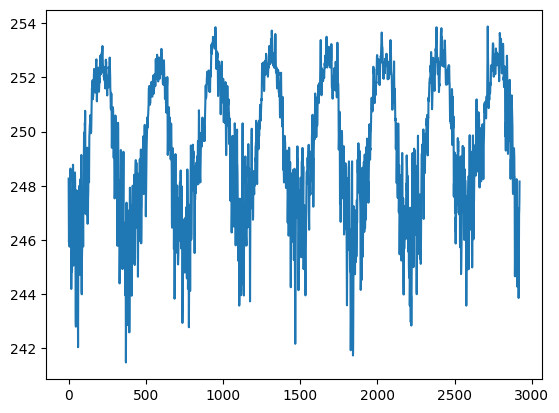

In [24]:
plt.plot(ds.data_vars['temperature'].values)

In [18]:
ds2 = xr.open_zarr(r"C:\Users\natal\Desktop\test_data\test_data\era5_2010_2014.zarr")

In [27]:
ds2

<xarray.Dataset> Size: 80kB
Dimensions:              (time: 1826)
Coordinates:
  * time                 (time) datetime64[ns] 15kB 2010-01-01 ... 2014-12-31
    latitude             float64 8B ...
    longitude            float64 8B ...
Data variables:
    divergence           (time) float32 7kB dask.array<chunksize=(1000,), meta=np.ndarray>
    geopotential         (time) float32 7kB dask.array<chunksize=(1000,), meta=np.ndarray>
    relative_humidity    (time) float32 7kB dask.array<chunksize=(1000,), meta=np.ndarray>
    specific_humidity    (time) float32 7kB dask.array<chunksize=(1000,), meta=np.ndarray>
    temperature          (time) float32 7kB dask.array<chunksize=(1000,), meta=np.ndarray>
    total_precipitation  (time) float32 7kB dask.array<chunksize=(1000,), meta=np.ndarray>
    u_component_of_wind  (time) float32 7kB dask.array<chunksize=(1000,), meta=np.ndarray>
    v_component_of_wind  (time) float32 7kB dask.array<chunksize=(1000,), meta=np.ndarray>
    vertical_velocity    (time) float32 7kB dask.array<chunksize=(1000,), meta=np.ndarray>

In [25]:
ds2.data_vars['temperature'].values

array([245.47878, 244.40486, 243.62392, ..., 247.58   , 246.68726,
       245.68503], shape=(1826,), dtype=float32)

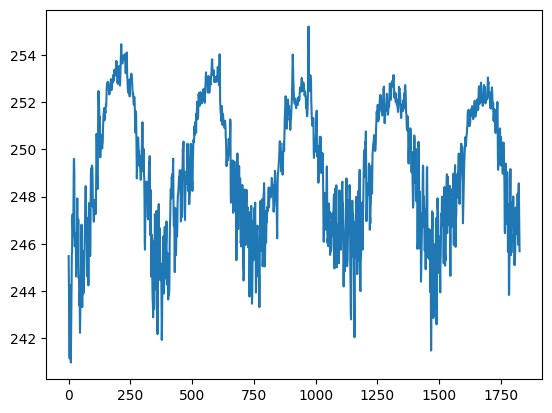

In [26]:
plt.plot(ds2.data_vars['temperature'].values)

# TRAIN BASELINE MODELS

In [ ]:
results = train_baseline_models(
    X_train, y_train, 
    pd.to_datetime(ds_train.time.values[HISTORY:]),
    X_val, y_val,
    pd.to_datetime(ds_val.time.values[HISTORY:]),
    X_test, y_test,
    pd.to_datetime(ds_test.time.values[HISTORY:])
)

print_results(results)

# EVALUATE EXTREME EVENT PREDICTIONS

In [ ]:
y_pred_lr = results['linear_regression']['y_pred']
evaluate_extreme_events(y_test, y_pred_lr, percentile=95)